In [28]:
import pandas
import sklearn
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
df = pandas.read_csv("D:/NTU/econometrics/hw4/hw4/Table 15_27.csv")

#print(df)
df.head()

,c1,c2,u,v,county,age,education,married,children,select,wagefull,wage,lw,work,lwf
0,-0.436205,-0.096918,-0.218103,-0.375727,1,22,10,1,0,16.791273,12.782769,NaN,NaN,0,0.000000
1,0.352141,0.300476,0.176070,0.461234,2,36,10,1,0,32.434814,20.312845,20.312845,3.011253,1,3.011253
2,1.077247,-1.595963,0.538623,-0.376244,3,28,10,1,0,19.185072,23.063478,NaN,NaN,0,0.000000
3,1.021283,-1.710498,0.510642,-0.496999,4,37,10,1,0,21.336010,24.527700,NaN,NaN,0,0.000000
4,-0.442960,0.308340,-0.221480,-0.092511,5,39,10,1,1,31.989870,16.142241,16.142241,2.781440,1,2.781440


In [40]:
#features = ['age', 'education', 'married', 'children', 'wagefull']

features = ['age', 'education', 'married', 'children']
X = df[features]
y = df['work']
X.head()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)
X_test.head()

,age,education,married,children
674,31,16,0,1
1699,33,12,0,2
1282,29,16,1,0
1315,32,12,1,3
1210,24,16,0,3


In [41]:
# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

674     1
1699    0
1282    1
1315    1
1210    1
       ..
1382    0
1371    1
854     0
995     1
1497    0
Name: work, Length: 600, dtype: int64
      age  education  married  children  work  y_pred
674    31         16        0         1     1       0
1699   33         12        0         2     0       1
1282   29         16        1         0     1       0
1315   32         12        1         3     1       1
1210   24         16        0         3     1       1
...   ...        ...      ...       ...   ...     ...
1382   26         10        0         0     0       0
1371   28         16        0         4     1       1
854    30         10        1         0     0       0
995    41         12        0         2     1       1
1497   47         12        1         1     0       1

[600 rows x 6 columns]


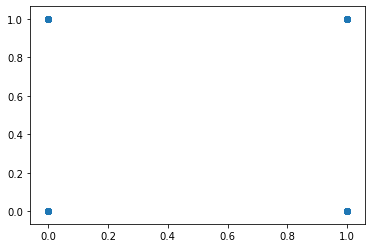

In [50]:
# Making predictions
y_pred = lr_model.predict(X_test)
print(y_test)
X_t = pandas.DataFrame(X_test)
y_t = pandas.DataFrame(y_test)
#y_p = pandas.DataFrame(y_pred, columns = ["y_pred"])
y_p = pandas.DataFrame(y_pred, columns = ["y_pred"], index = X_test.index.copy())
df_p = pandas.concat([X_t,y_t,y_p], axis = 1)
print(df_p)
#plt.clf()
plt.scatter(df_p["work"], df_p["y_pred"])
#plt.scatter(X_test, y_pred, c="red")
plt.show()

# Accuracy
#print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")


In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.74


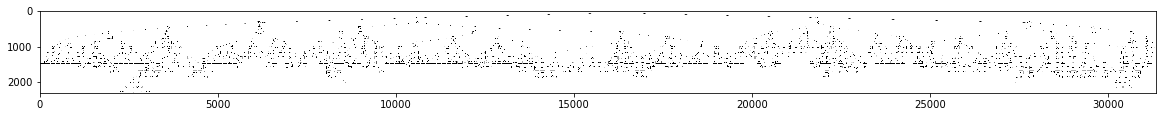

In [47]:
#決策樹效果不好
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 20)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()
#Image(graph.create_png())